Prepare dataset

In [122]:
import pandas as pd
import numpy as np

df= pd.read_csv("data/credit_risk.csv") # https://www.kaggle.com/datasets/upadorprofzs/credit-risk

df["y"] = df["default"]
df.drop(["default", "clientid"], axis=1, inplace=True)
df.dropna(inplace=True)

df.head()

,income,age,loan,y
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


Calculate imbalance in dataset

In [123]:
X, y = df.drop("y", axis=1), df["y"]

y.value_counts()[0] / len(y)

0.8582874311467201

Split data into test and validation sets

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=True, stratify=y)

Oversampling the training data

In [125]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

GBT Algorithm

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbt = GradientBoostingClassifier(learning_rate=0.3, max_depth=6, criterion="friedman_mse", n_estimators=100, n_iter_no_change=5, tol=0.001, random_state=0)

model_gbt.fit(X_train, y_train)
y_pred = model_gbt.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       515
           1       0.91      0.93      0.92        85

    accuracy                           0.98       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.98      0.98      0.98       600



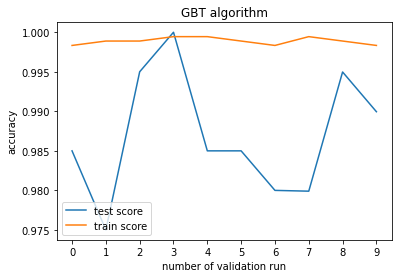

In [127]:
cv = cross_validate(model_gbt, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("GBT algorithm")
plt.show()

AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(learning_rate=0.3, n_estimators=100, random_state=0)

model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       515
           1       0.85      0.99      0.91        85

    accuracy                           0.97       600
   macro avg       0.92      0.98      0.95       600
weighted avg       0.98      0.97      0.97       600



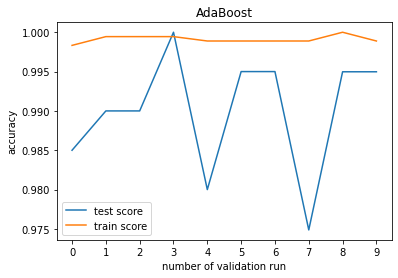

In [129]:
cv = cross_validate(model_ada, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("AdaBoost")
plt.show()

XGBoost

In [130]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       515
           1       0.95      0.94      0.95        85

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



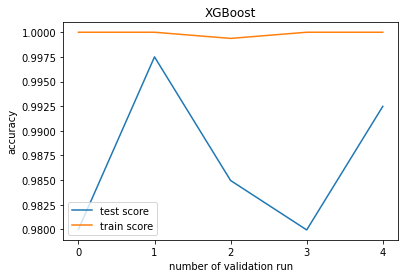

In [131]:
cv = cross_validate(model_xgb, X, y, return_train_score=True, cv=5)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("XGBoost")
plt.show()

In [132]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=6, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       515
           1       0.80      0.96      0.88        85

    accuracy                           0.96       600
   macro avg       0.90      0.96      0.93       600
weighted avg       0.97      0.96      0.96       600



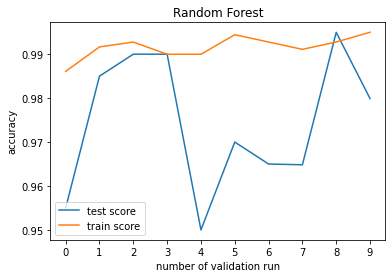

In [133]:
cv = cross_validate(model_rf, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("Random Forest")
plt.show()